<a href="https://colab.research.google.com/github/path-0f-misantrope/most_uselles_musor2/blob/main/thats_incredble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder



from xgboost import XGBClassifier  # Для Gradient Boosting
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV

In [58]:
df = pd.read_csv("/content/train.csv")
df.info()
df.shape


<ipython-input-58-412c2cb385a2>:1: DtypeWarning: Columns (51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,131,132,133,135,136,139,140,141,142,143,144,145,146,147,148,149,151,152,155,156,157,158,159,160,161,163,164,165,167,168,169,171,172,173,174,175,176,177,178,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,223,224,227,239,240,241,242,243,244,245,246,459,460,461,467,468,469,515,516,523,524,531,532,539,540,547,548,555,556,563,564,565,567,571,572,573,575,579,580,581,582,583,587,588,595,596,603,604,611,612,613,615,795,796,797,799,1031,1032,1033,1034,1035,1036,1037,1039,1040,1041,1042,1043,1044,1045,1047,1048,1049,1050,1051,1052,1055,1056,1057,1058,1059,1060,1063,1064,1065,1067,1068,1069,1072,1073,1074,1075,1076,1077,1078,1172,1173,1174,1176,1177,1178,1179,1180,1181,1182,1275,1276,1277,1278,1279,1280,1281,1282,1447,1448,1449,1450,1451,1452,1453,1454,1649,1650,

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14456 entries, 0 to 14455
Columns: 2666 entries, report_date to col2663
dtypes: float64(2316), int64(3), object(347)
memory usage: 294.0+ MB


(14456, 2666)

In [59]:
df.drop_duplicates()
constant_columns = [col for col in df.columns if df[col].nunique() == 1]
df = df.drop(columns=constant_columns)
df = df.T.drop_duplicates().T




Удаление Одинаковых строк и столбцов

<Axes: >

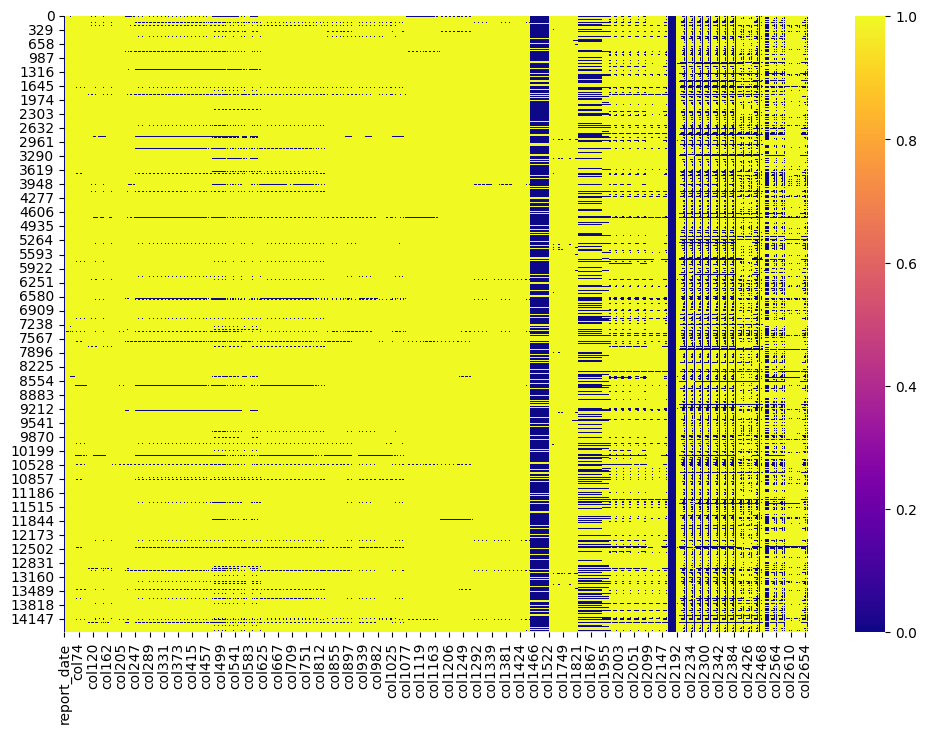

In [4]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cmap='plasma')


In [60]:
df.fillna(0, inplace=True)
for col in df.select_dtypes(include=['float', 'int']):
    mode = df[col].mode().iloc[0]  # Находим моду (первое значение в случае нескольких мод)
    df[col].fillna(mode, inplace=True)  # Заменяем NaN на моду

df = df.dropna(axis=1, how='all') # Удаление полностью пустых колонок

# Удаляем колонки, заполненные менее чем на 50%
threshold = 0.45 * len(df)
df = df.loc[:, df.notna().sum() >= threshold]

# Удаляем колонки, где все значения одинаковые
df = df.loc[:, df.nunique() > 1]

df.drop(['col1454'], axis = 1, inplace = True) # там хэши какие то говно
df.drop(['report_date'], axis = 1, inplace = True) # удаляю дату потому что могу
# Импорт библиотек для работы с регулярными выражениями
import re

# Удаляем колонки, где есть хотя бы одна ссылка
df = df.drop(columns=[col for col in df.columns if df[col].astype(str).str.contains(r'http[s]?://', na=False).any()])





<ipython-input-60-99839e9f7bf2>:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(0, inplace=True)
<ipython-input-60-99839e9f7bf2>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode, inplace=True)  # Заменяем NaN на моду
<ipython-input-60-99839e9f7bf2>:4: FutureWarning: A value is try

  меняет все nan на 0.заполняет модой nan в числовых столбах(не сработало потому что они были обжектами). убирает колонки наполовину пустые. убирает все колонки со всеми одинаковыми значениями. удаляет ссылки.

<Axes: >

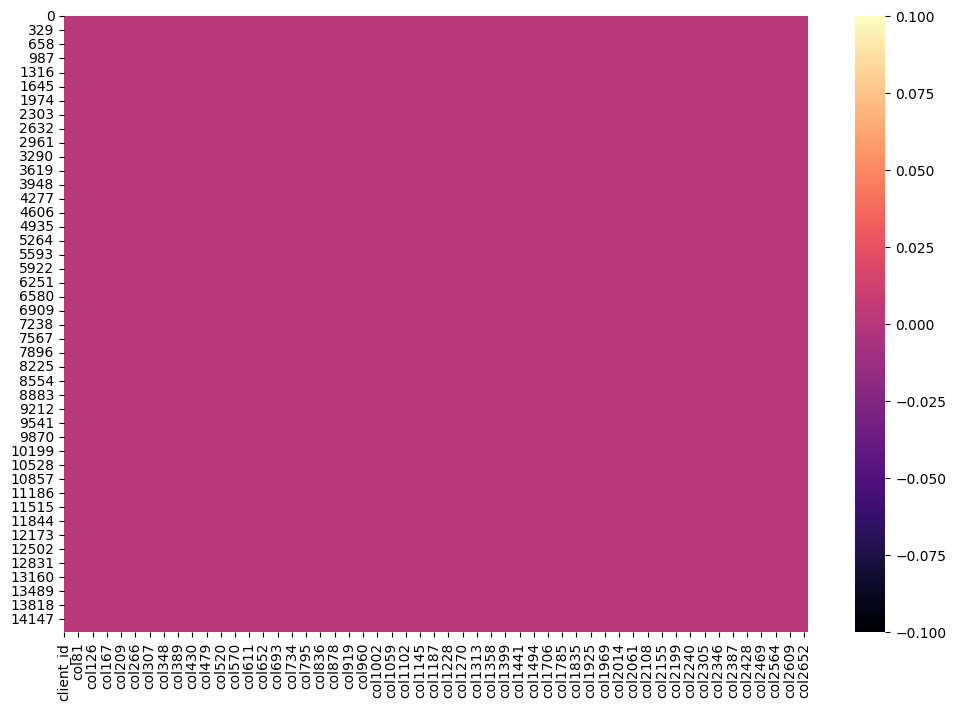

In [6]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cmap='magma')

In [61]:
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].replace(0, '').astype(str)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14456 entries, 0 to 14455
Columns: 2144 entries, client_id to col2663
dtypes: float64(1859), int64(3), object(282)
memory usage: 236.5+ MB


замена 0 в object колонках на пустю строку


In [8]:
#from sklearn.ensemble import IsolationForest

#X = df.select_dtypes(include=['float', 'int']).dropna()
##iso.fit(X)

# Предсказания: -1 = выбросы, 1 = нормальные данные
#df['is_outlier'] = iso.predict(X)
#print(df[df['is_outlier'] == -1])


из за большого количества нулей он считает все выбросами так что блииин((((

In [9]:
df.head(15)

,client_id,target,col1,col2,col3,col4,col7,col8,col27,col28,...,col2654,col2655,col2656,col2657,col2658,col2659,col2660,col2661,col2662,col2663
0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.256261
1,5,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7616803.0,7616803.0,7616803.0,0.0,0.0,0.0,7616803.0,7616803.0,7616803.0,0.256261
2,6,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.256261
3,7,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.258682
4,8,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.254164
5,10,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10850000.0,10850000.0,10850000.0,0.0,0.0,0.0,10850000.0,10850000.0,10850000.0,0.318994
6,16,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.258853
7,17,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.256261
8,18,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.266285
9,19,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.256261


и тут я понял что только nan на моду менял
но пока оставлю ченет



# Настройка моделей


In [13]:
df_to_cod = df
categorical_columns = df_to_cod.select_dtypes(include=['object']).columns.tolist()
for col in df[categorical_columns]:

        le = LabelEncoder()  # Создаем новый LabelEncoder
        df_to_cod[col] = le.fit_transform(df[col])  # Кодируем колонку
X = df_to_cod.drop(columns=['target'])  # Замените 'target' на название вашей целевой переменной
y = df_to_cod['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Gradient Boosting (XGBoost)
gb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=10, random_state=42)

In [19]:
# Random Forest
rf_model.fit(X_train, y_train)

# Gradient Boosting
gb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [20]:
'''
rf_params = {'n_estimators': [100, 200], 'max_depth': [10, 20, None]}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=3)
grid_rf.fit(X_train, y_train)
print("Best Random Forest Parameters:", grid_rf.best_params_)

 для Gradient Boosting
gb_params = {'n_estimators': [100, 200], 'learning_rate': [0.05, 0.1], 'max_depth': [3, 5, 10]}
grid_gb = GridSearchCV(XGBClassifier(random_state=42), gb_params, cv=3)
grid_gb.fit(X_train, y_train)
print("Best Gradient Boosting Parameters:", grid_gb.best_params_)
'''

Best Random Forest Parameters: {'max_depth': None, 'n_estimators': 100}
Best Gradient Boosting Parameters: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200}


In [26]:
rf_model = RandomForestClassifier(n_estimators= 100,max_depth= None, random_state=42)
gb_model = XGBClassifier(n_estimators= 200,learning_rate=0.1,max_depth= 10,random_state=42)
rf_model.fit(X_train, y_train)

# Gradient Boosting
gb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

йоуууу я на это час потратил


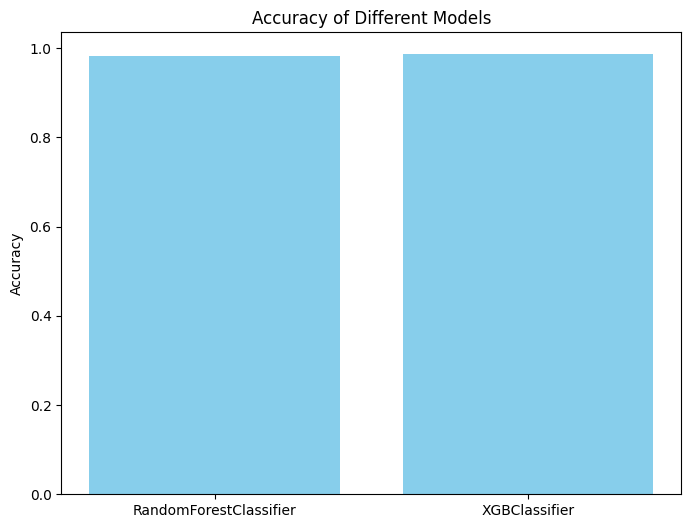

In [49]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix



# Словарь для хранения метрик
metrics = {}

# Модели
models = {
    'RandomForestClassifier':rf_model,
    'XGBClassifier': gb_model
}

# Обучение моделей и вычисление метрик
for model_name, model in models.items():
    # Получаем предсказания
    y_pred = model.predict(X_test)

    # Вычисляем метрики
    metrics[model_name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, average='macro', zero_division=0),
        'recall': recall_score(y_test, y_pred, average='macro'),
        'f1': f1_score(y_test, y_pred, average='macro'),
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }

    # Для ROC и AUC
    if len(set(y_test)) == 2:  # Проверяем, что задача бинарная
        y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        metrics[model_name]['fpr'] = fpr
        metrics[model_name]['tpr'] = tpr
        metrics[model_name]['roc_auc'] = auc(fpr, tpr)

# 1. График точности
model_names = list(metrics.keys())
accuracy_values = [metrics[model]['accuracy'] for model in model_names]

plt.figure(figsize=(8, 6))
plt.bar(model_names, accuracy_values, color='skyblue')
plt.title('Accuracy of Different Models')
plt.ylabel('Accuracy')
plt.show()



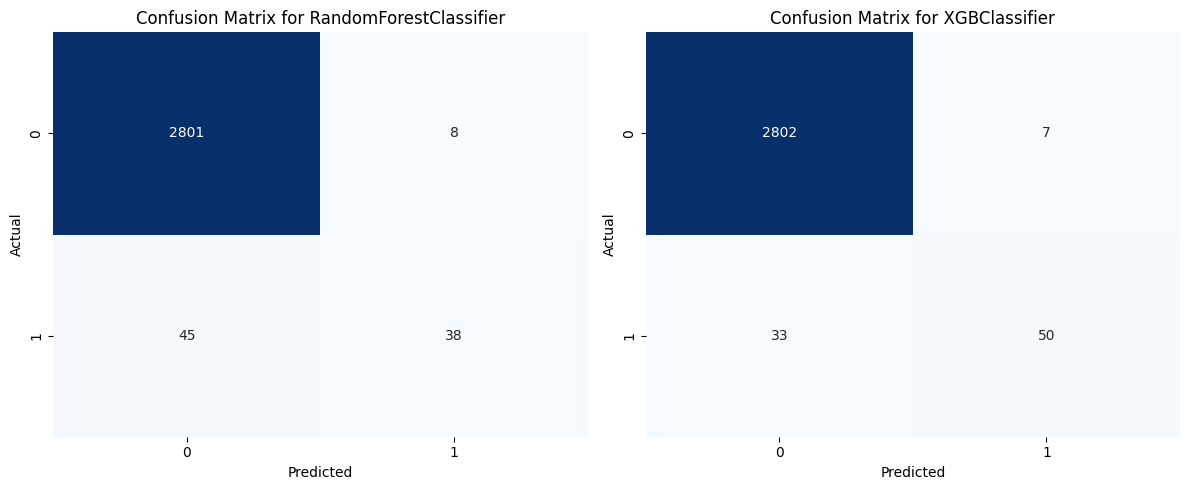

In [50]:
fig, axes = plt.subplots(1, len(models), figsize=(12, 5))

for idx, (model_name, model) in enumerate(models.items()):
    cm = metrics[model_name]['confusion_matrix']
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[idx])
    axes[idx].set_title(f'Confusion Matrix for {model_name}')
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

plt.tight_layout()
plt.show()






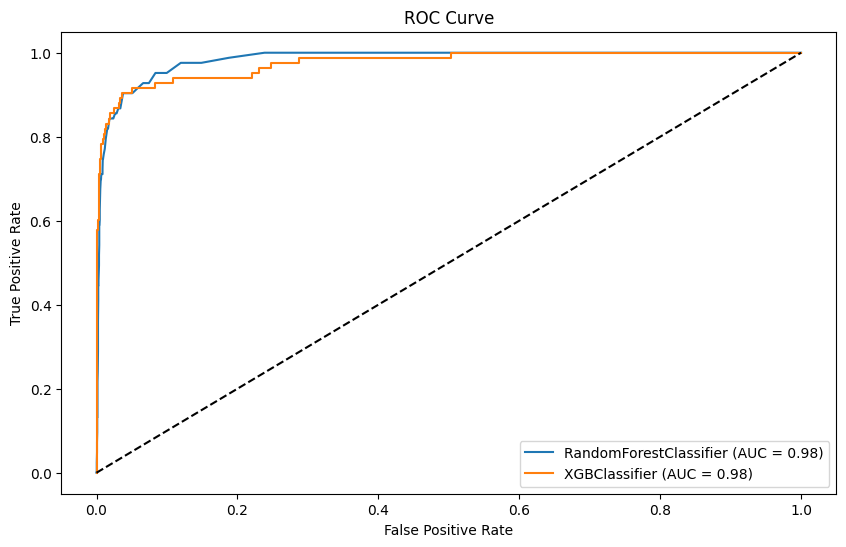

In [35]:
# 3. ROC-кривые (если задача бинарная)
if 'roc_auc' in metrics['RandomForestClassifier']:
    plt.figure(figsize=(10, 6))
    for model_name, model in models.items():
        fpr = metrics[model_name]['fpr']
        tpr = metrics[model_name]['tpr']
        auc_score = metrics[model_name]['roc_auc']
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')  # Линия случайного классификатора
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

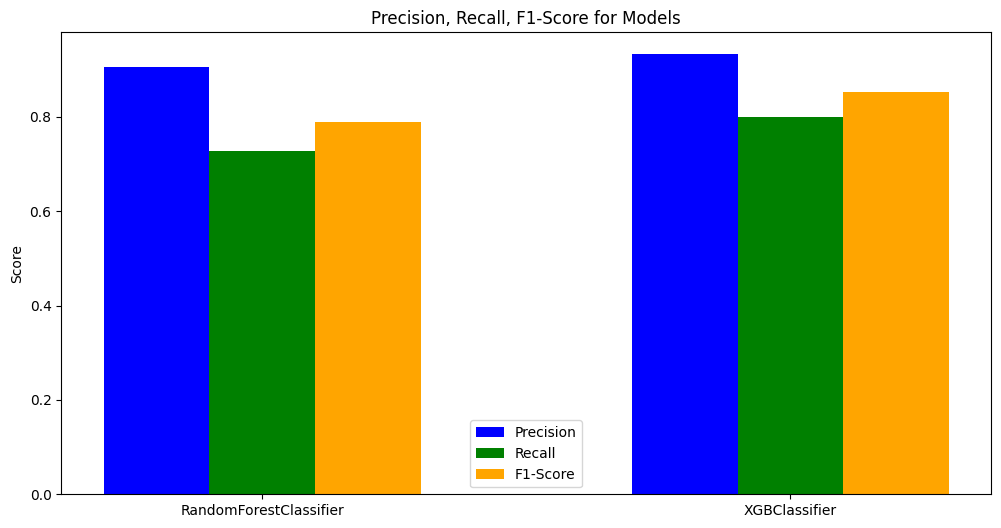

In [51]:
# 2. Графики Precision, Recall и F1-Score
precision_values = [metrics[model]['precision'] for model in models]
recall_values = [metrics[model]['recall'] for model in models]
f1_values = [metrics[model]['f1'] for model in models]
model_names = list(models.keys())

plt.figure(figsize=(12, 6))
x = range(len(models))

plt.bar([i - 0.2 for i in x], precision_values, width=0.2, label='Precision', align='center', color='blue')
plt.bar(x, recall_values, width=0.2, label='Recall', align='center', color='green')
plt.bar([i + 0.2 for i in x], f1_values, width=0.2, label='F1-Score', align='center', color='orange')

plt.xticks(x, model_names)
plt.title('Precision, Recall, F1-Score for Models')
plt.ylabel('Score')
plt.legend()
plt.show()

In [52]:
# Вывод метрик в консоль
for model_name, model_metrics in metrics.items():
    print(f"Metrics for {model_name}:")
    print(f"  Accuracy: {model_metrics['accuracy']:.4f}")
    print(f"  Precision: {model_metrics['precision']:.4f}")
    print(f"  Recall: {model_metrics['recall']:.4f}")
    print(f"  F1-Score: {model_metrics['f1']:.4f}")
    print()


Metrics for RandomForestClassifier:
  Accuracy: 0.9817
  Precision: 0.9051
  Recall: 0.7275
  F1-Score: 0.7899

Metrics for XGBClassifier:
  Accuracy: 0.9862
  Precision: 0.9328
  Recall: 0.8000
  F1-Score: 0.8536



**Metrics for RandomForestClassifier:**
  Accuracy: 0.9817

  Precision: 0.9051

  Recall: 0.7275

  F1-Score: 0.7899


***Metrics for XGBClassifier:***
  
  Accuracy: 0.9862
  
  Precision: 0.9328
  
  Recall: 0.8000
  
  F1-Score: 0.8536

In [54]:
valid = pd.read_csv('/content/valid.csv')


<ipython-input-54-63bb3edf773d>:1: DtypeWarning: Columns (51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,88,89,91,95,96,99,131,132,133,135,136,141,142,145,146,147,148,151,155,156,157,159,163,164,167,172,173,174,175,176,177,178,183,184,185,187,188,191,192,193,195,196,203,204,207,211,212,215,239,240,243,244,459,467,563,567,571,575,579,580,583,795,799,1031,1032,1033,1034,1035,1036,1039,1047,1055,1063,1071,1177,1178,1179,1180,1181,1277,1278,1281,1282,1447,1448,1449,1450,1451,1452,1453,1454,1653,1654,1656,2193,2194,2199) have mixed types. Specify dtype option on import or set low_memory=False.
  valid = pd.read_csv('/content/valid.csv')


In [56]:
valid.fillna(0, inplace=True)


valid = df.dropna(axis=1, how='all') # Удаление полностью пустых колонок

# Удаляем колонки, заполненные менее чем на 50%
threshold = 0.45 * len(valid)
valid = df.loc[:, df.notna().sum() >= threshold]

# Удаляем колонки, где все значения одинаковые
valid = df.loc[:, df.nunique() > 1]


# Импорт библиотек для работы с регулярными выражениями
import re

# Удаляем колонки, где есть хотя бы одна ссылка
valid = valid.drop(columns=[col for col in df.columns if df[col].astype(str).str.contains(r'http[s]?://', na=False).any()])
for col in valid.select_dtypes(include=['object']).columns:
    valid[col] = valid[col].replace(0, '').astype(str)

In [62]:
valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14456 entries, 0 to 14455
Columns: 2144 entries, client_id to col2663
dtypes: float64(1859), int64(285)
memory usage: 236.5 MB


In [64]:
# Оставляем только те колонки в валидационном датасете, которые есть в обучающемc
valid = df[df.columns.intersection(df.columns)]
missing_columns = set(df.columns) - set(valid.columns)

for col in missing_columns:
    valid[col] = 0  # Или другое значение, например, среднее/медиану по обучающему набору

# Приводим порядок колонок к обучающему набору
valid = valid[df.columns]

In [66]:
valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14456 entries, 0 to 14455
Columns: 2144 entries, client_id to col2663
dtypes: float64(1859), int64(3), object(282)
memory usage: 236.5+ MB


In [69]:
categorical_columns = valid.select_dtypes(include=['object']).columns.tolist()
print(valid[categorical_columns[15]].unique())

['' 'apt_kitchen' 'apt_storage' 'apt_furniture']


In [77]:
valid1 = valid
for col in df[categorical_columns]:

        le = LabelEncoder()  # Создаем новый LabelEncoder
        valid1[col] = le.fit_transform(valid[col])  # Кодируем колонку


In [79]:
X_val = valid1.drop(columns=['target'])  # Замените 'target' на название вашей целевой переменной
y_val = valid1['target']

In [80]:
val_metrics = {}

# Расчет метрик для каждой модели
for model_name, model in models.items():
    # Предсказания на валидационном наборе
    y_val_pred = model.predict(X_val)

    val_metrics[model_name] = {
        'accuracy': accuracy_score(y_val, y_val_pred),
        'precision': precision_score(y_val, y_val_pred, average='macro', zero_division=0),
        'recall': recall_score(y_val, y_val_pred, average='macro'),
        'f1': f1_score(y_val, y_val_pred, average='macro'),
        'confusion_matrix': confusion_matrix(y_val, y_val_pred)
    }

# Вывод метрик на валидационном наборе
for model_name, model_metrics in val_metrics.items():
    print(f"Validation Metrics for {model_name}:")
    print(f"  Accuracy: {model_metrics['accuracy']:.4f}")
    print(f"  Precision: {model_metrics['precision']:.4f}")
    print(f"  Recall: {model_metrics['recall']:.4f}")
    print(f"  F1-Score: {model_metrics['f1']:.4f}")
    print()

Validation Metrics for RandomForestClassifier:
  Accuracy: 0.9963
  Precision: 0.9884
  Recall: 0.9481
  F1-Score: 0.9673

Validation Metrics for XGBClassifier:
  Accuracy: 0.9972
  Precision: 0.9902
  Recall: 0.9608
  F1-Score: 0.9750



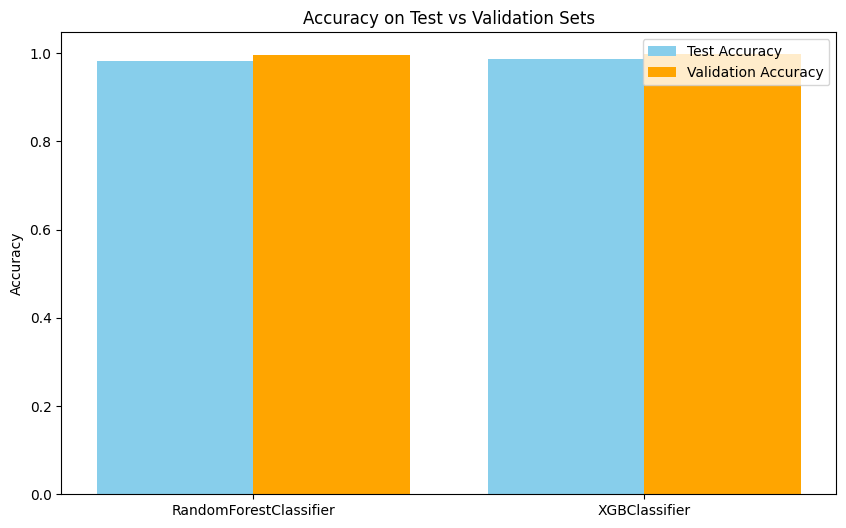

In [81]:
# Сравнение точности на тестовом и валидационном наборах
test_accuracies = [metrics[model]['accuracy'] for model in model_names]
val_accuracies = [val_metrics[model]['accuracy'] for model in model_names]

plt.figure(figsize=(10, 6))
x = range(len(model_names))

plt.bar([i - 0.2 for i in x], test_accuracies, width=0.4, label='Test Accuracy', color='skyblue')
plt.bar([i + 0.2 for i in x], val_accuracies, width=0.4, label='Validation Accuracy', color='orange')

plt.xticks(x, model_names)
plt.ylabel('Accuracy')
plt.title('Accuracy on Test vs Validation Sets')
plt.legend()
plt.show()


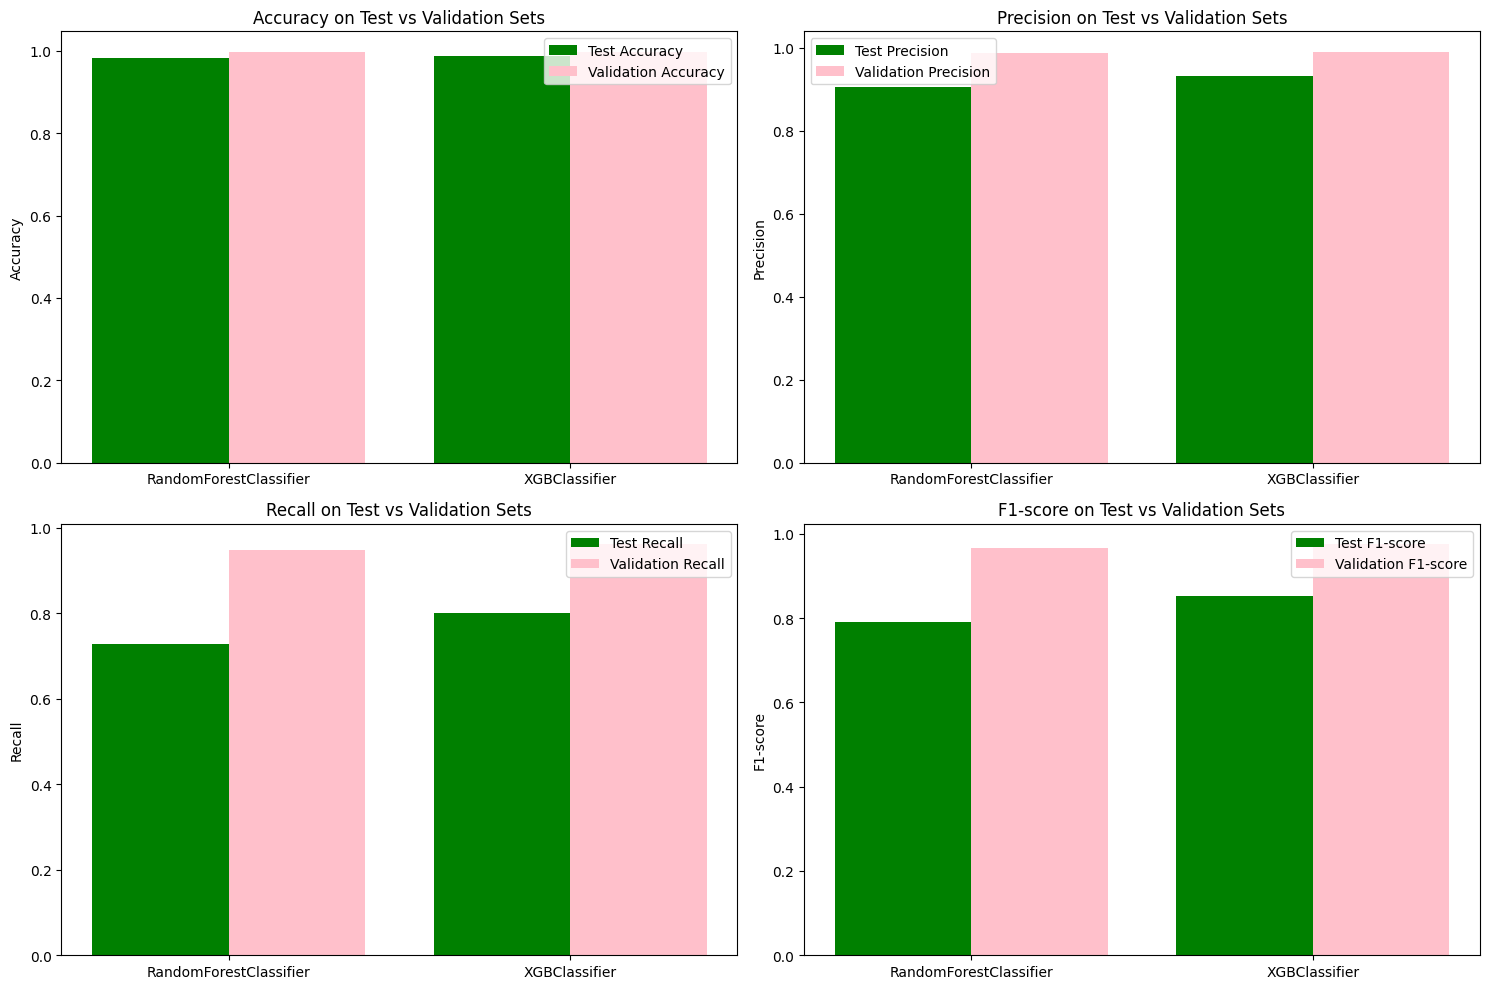

In [84]:
metric_names = ['accuracy', 'precision', 'recall', 'f1']
metric_labels = ['Accuracy', 'Precision', 'Recall', 'F1-score']

# Построение графиков для каждой метрики
plt.figure(figsize=(15, 10))

for i, metric in enumerate(metric_names):
    # Значения метрики для тестового и валидационного наборов
    test_values = [metrics[model][metric] for model in model_names]
    val_values = [val_metrics[model][metric] for model in model_names]

    # Создаем подграфик
    plt.subplot(2, 2, i + 1)  # 2x2 сетка графиков

    x = range(len(model_names))

    # Гистограммы для тестового и валидационного наборов
    plt.bar([i - 0.2 for i in x], test_values, width=0.4, label='Test ' + metric_labels[i], color='green')
    plt.bar([i + 0.2 for i in x], val_values, width=0.4, label='Validation ' + metric_labels[i], color='pink')

    # Настройки графика
    plt.xticks(x, model_names)
    plt.ylabel(metric_labels[i])
    plt.title(f'{metric_labels[i]} on Test vs Validation Sets')
    plt.legend()

# Показываем все графики
plt.tight_layout()
plt.show()